<a href="https://colab.research.google.com/github/data2450/rosman-sales-prediciton/blob/main/part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime

In [ ]:
t=pd.read_csv('/content/drive/MyDrive/datasets_for_colab/dataset/TEST.csv')

In [ ]:
t['index1'] = t.index

In [ ]:
test_Z=t.loc[t.Open==0]

In [ ]:
tr=pd.read_csv('/content/drive/MyDrive/datasets_for_colab/dataset/train_versio2.csv')
test_1=pd.read_csv('/content/drive/MyDrive/datasets_for_colab/dataset/test_versio2.csv')

In [ ]:
tr_o=pd.read_csv('/content/drive/MyDrive/datasets_for_colab/dataset/TRAIN.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
tr_0

In [ ]:
#tr=tr.drop(['SalePerCustomer'],axis=1)

In [ ]:
tr['weekend']=np.where(tr['DayOfWeek']>5,1,0)

In [ ]:
tr_o['weekend']=np.where(tr_o['DayOfWeek']>5,1,0)

In [ ]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589948 entries, 0 to 589947
Data columns (total 37 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      589948 non-null  int64  
 1   DayOfWeek                  589948 non-null  int64  
 2   Date                       589948 non-null  object 
 3   Sales                      589948 non-null  float64
 4   Customers                  589948 non-null  int64  
 5   Open                       589948 non-null  int64  
 6   Promo                      589948 non-null  int64  
 7   StateHoliday               589948 non-null  int64  
 8   SchoolHoliday              589948 non-null  int64  
 9   StoreType                  589948 non-null  int64  
 10  Assortment                 589948 non-null  int64  
 11  CompetitionDistance        589948 non-null  float64
 12  CompetitionOpenSinceMonth  589948 non-null  float64
 13  CompetitionOpenSinceYear   58

In [ ]:
tr.weekend.value_counts()

0    486727
1    103221
Name: weekend, dtype: int64

In [ ]:
tr_remo=tr_o[(tr_o.Open != 0)&(tr_o.Sales >0)]

In [ ]:
tr_remo.shape

(589948, 9)

In [ ]:
tr_remo['SalePerCustomer'] = (tr_remo['Sales']/tr_remo['Customers']).round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tr_remo.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalePerCustomer
0,1,5,2015-07-31,5263,555,1,1,0,1,9.48
1,2,5,2015-07-31,6064,625,1,1,0,1,9.70
2,3,5,2015-07-31,8314,821,1,1,0,1,10.13
3,4,5,2015-07-31,13995,1498,1,1,0,1,9.34
4,5,5,2015-07-31,4822,559,1,1,0,1,8.63


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


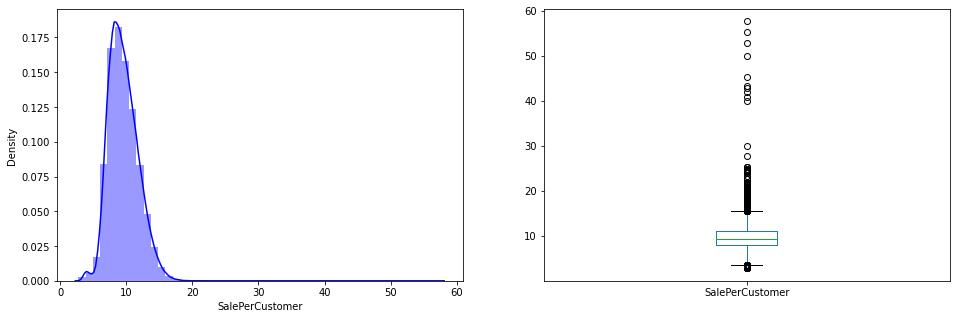

In [ ]:
plt.subplot(121)
sns.distplot(tr_remo['SalePerCustomer'],color="b");

plt.subplot(122)
tr_remo['SalePerCustomer'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
dr_new=pd.DataFrame(tr_remo.groupby('Store')['SalePerCustomer'].agg(['median','mean']))

In [ ]:
dr1=tr_o.groupby(['Store','Promo','weekend'])['Sales'].agg(['median','std'])

In [ ]:
dr1

median
Store Promo weekend          
1     0     0        8.245122
            1        8.467583
      1     0        8.545100
2     0     0        8.344146
            1        7.954372
...                       ...
1114  0     1        9.989711
      1     0        9.991086
1115  0     0        8.528627
            1        8.852379
      1     0        8.915231

[3345 rows x 1 columns]

In [ ]:
dr_new.head()

,median,mean
Store,,
1,8.410,8.438736
2,8.400,8.508633
3,9.150,9.172899
4,7.280,7.315306
5,8.675,8.691014


In [ ]:
dr_new.reset_index(inplace=True)

In [ ]:
dr_new.columns=['Store','SC_per_med']

In [ ]:
dr_new.SC_per_med=(dr_new.SC_per_med).round(2)

In [ ]:
dr_new.head()

,Store,SC_per_med
0,1,8.41
1,2,8.40
2,3,9.15
3,4,7.28
4,5,8.68


In [ ]:
full_train=pd.merge(tr, dr_new, on='Store')

In [ ]:
  # Indicate whether the month is in promo interval
month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', \
             7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
full_train['month_str'] = full_train.month.map(month2str)

In [ ]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589948 entries, 0 to 589947
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      589948 non-null  int64  
 1   DayOfWeek                  589948 non-null  int64  
 2   Date                       589948 non-null  object 
 3   Sales                      589948 non-null  float64
 4   Customers                  589948 non-null  int64  
 5   Open                       589948 non-null  int64  
 6   Promo                      589948 non-null  int64  
 7   StateHoliday               589948 non-null  int64  
 8   SchoolHoliday              589948 non-null  int64  
 9   StoreType                  589948 non-null  int64  
 10  Assortment                 589948 non-null  int64  
 11  CompetitionDistance        589948 non-null  float64
 12  CompetitionOpenSinceMonth  589948 non-null  float64
 13  CompetitionOpenSinceYear   58

In [ ]:
def check(row):
    if isinstance(row['PromoInterval'],str) and row['month_str'] in row['PromoInterval']:
          return 1
    else:
          return 0

In [ ]:
full_train['IsPromoMonth'] =  full_train.apply(lambda row: check(row),axis=1) 

In [ ]:
full_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year,WeekOfYear,CompetitionOpen,PromoOpen,S_mean,S_median,S_std,S_q90,S_q25,S_q01,C_mean,C_medin,C_std,C_q90,C_q25,C_q01,SC_per_med,month_str,IsPromoMonth
0,1,5,2015-07-31,8.568646,555,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0,31,7,2015,31,82.0,24187.75,4716.82,4599.5,1047.67,6029.0,3919.25,3107.8,555.58,542.0,96.26,667.7,493.0,408.18,8.41,Jul,0
1,1,4,2015-07-30,8.521384,546,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0,30,7,2015,31,82.0,24187.75,4716.82,4599.5,1047.67,6029.0,3919.25,3107.8,555.58,542.0,96.26,667.7,493.0,408.18,8.41,Jul,0
2,1,3,2015-07-29,8.472823,523,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0,29,7,2015,31,82.0,24187.75,4716.82,4599.5,1047.67,6029.0,3919.25,3107.8,555.58,542.0,96.26,667.7,493.0,408.18,8.41,Jul,0
3,1,2,2015-07-28,8.519590,560,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0,28,7,2015,31,82.0,24187.75,4716.82,4599.5,1047.67,6029.0,3919.25,3107.8,555.58,542.0,96.26,667.7,493.0,408.18,8.41,Jul,0
4,1,1,2015-07-27,8.716536,612,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0,27,7,2015,31,82.0,24187.75,4716.82,4599.5,1047.67,6029.0,3919.25,3107.8,555.58,542.0,96.26,667.7,493.0,408.18,8.41,Jul,0


# test

In [ ]:
test_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254409 entries, 0 to 254408
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      254409 non-null  int64  
 1   DayOfWeek                  254409 non-null  int64  
 2   Promo                      254409 non-null  int64  
 3   StateHoliday               254409 non-null  int64  
 4   SchoolHoliday              254409 non-null  int64  
 5   index1                     254409 non-null  int64  
 6   StoreType                  254409 non-null  int64  
 7   Assortment                 254409 non-null  int64  
 8   CompetitionDistance        254409 non-null  float64
 9   CompetitionOpenSinceMonth  254409 non-null  float64
 10  CompetitionOpenSinceYear   254409 non-null  float64
 11  Promo2                     254409 non-null  int64  
 12  Promo2SinceWeek            254409 non-null  float64
 13  Promo2SinceYear            25

In [ ]:
full_test=pd.merge(test_1, dr_new, on='Store')

In [ ]:
full_test['month_str'] = full_test.month.map(month2str)

In [ ]:
full_test['IsPromoMonth'] =  full_test.apply(lambda row: check(row),axis=1) 

In [ ]:
full_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254409 entries, 0 to 254408
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      254409 non-null  int64  
 1   DayOfWeek                  254409 non-null  int64  
 2   Promo                      254409 non-null  int64  
 3   StateHoliday               254409 non-null  int64  
 4   SchoolHoliday              254409 non-null  int64  
 5   index1                     254409 non-null  int64  
 6   StoreType                  254409 non-null  int64  
 7   Assortment                 254409 non-null  int64  
 8   CompetitionDistance        254409 non-null  float64
 9   CompetitionOpenSinceMonth  254409 non-null  float64
 10  CompetitionOpenSinceYear   254409 non-null  float64
 11  Promo2                     254409 non-null  int64  
 12  Promo2SinceWeek            254409 non-null  float64
 13  Promo2SinceYear            25

In [ ]:
full_test.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,index1,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year,WeekOfYear,CompetitionOpen,PromoOpen,S_mean,S_median,S_std,S_q90,S_q25,S_q01,C_mean,C_medin,C_std,C_q90,C_q25,C_q01,SC_per_med,IsPromoMonth,month_str
0,767,3,0,0,0,16,1,3,13080.0,0.0,0.0,0,0.0,0.0,0,7,8,2013,32,24164.0,24164.00,6097.09,5986.0,1931.93,8817.2,4811.0,2697.42,615.48,622.0,158.22,796.6,542.5,291.54,9.7,0,Aug
1,767,6,0,0,0,3582,1,3,13080.0,0.0,0.0,0,0.0,0.0,0,13,7,2013,28,24163.0,24163.00,6097.09,5986.0,1931.93,8817.2,4811.0,2697.42,615.48,622.0,158.22,796.6,542.5,291.54,9.7,0,Jul
2,767,6,0,0,0,9772,1,3,13080.0,0.0,0.0,0,0.0,0.0,0,3,8,2013,31,24164.0,24163.75,6097.09,5986.0,1931.93,8817.2,4811.0,2697.42,615.48,622.0,158.22,796.6,542.5,291.54,9.7,0,Aug
3,767,1,1,0,1,10006,1,3,13080.0,0.0,0.0,0,0.0,0.0,0,29,7,2013,31,24163.0,24163.75,6097.09,5986.0,1931.93,8817.2,4811.0,2697.42,615.48,622.0,158.22,796.6,542.5,291.54,9.7,0,Jul
4,767,5,0,0,1,12614,1,3,13080.0,0.0,0.0,0,0.0,0.0,0,10,5,2013,19,24161.0,24160.75,6097.09,5986.0,1931.93,8817.2,4811.0,2697.42,615.48,622.0,158.22,796.6,542.5,291.54,9.7,0,May


# model

In [ ]:
train_new_on = full_train.sort_values(['Date'],ascending = False)


In [ ]:
train_new_on.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year,WeekOfYear,CompetitionOpen,PromoOpen,S_mean,S_median,S_std,S_q90,S_q25,S_q01,C_mean,C_medin,C_std,C_q90,C_q25,C_q01,SC_per_med,month_str,IsPromoMonth
0,1,5,2015-07-31,8.568646,555,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0,31,7,2015,31,82.0,24187.75,4716.82,4599.5,1047.67,6029.0,3919.25,3107.80,555.58,542.0,96.26,667.7,493.0,408.18,8.41,Jul,0
469095,593,5,2015-07-31,9.335562,1375,1,1,0,1,1,3,33060.0,3.0,2010.0,0,0.0,0.0,0,31,7,2015,31,64.0,24187.75,9582.74,9111.0,2458.52,12775.4,7771.00,5454.22,1227.74,1187.0,254.94,1544.6,1057.0,701.02,7.72,Jul,0
274973,1105,5,2015-07-31,8.986572,765,1,1,0,1,3,3,330.0,11.0,2008.0,1,5.0,2013.0,2,31,7,2015,31,80.0,30.50,4919.71,4668.0,1602.51,7260.0,3700.00,2616.50,542.51,525.0,124.47,716.0,452.5,337.50,8.83,Jul,0
51866,814,5,2015-07-31,9.289336,884,1,1,0,1,4,3,24530.0,7.0,2013.0,0,0.0,0.0,0,31,7,2015,31,24.0,24187.75,8641.34,8232.0,2699.25,12471.4,6553.00,4775.92,701.97,690.0,159.49,914.4,584.0,444.00,11.99,Jul,0
275524,79,5,2015-07-31,8.875007,643,1,1,0,1,1,1,3320.0,0.0,0.0,0,0.0,0.0,0,31,7,2015,31,24187.0,24187.75,5589.48,5200.5,1585.21,7964.6,4327.25,3467.86,568.85,550.5,110.56,726.1,487.0,389.98,9.62,Jul,0


In [ ]:
train_new_on.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589948 entries, 0 to 589947
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      589948 non-null  int64  
 1   DayOfWeek                  589948 non-null  int64  
 2   Date                       589948 non-null  object 
 3   Sales                      589948 non-null  float64
 4   Customers                  589948 non-null  int64  
 5   Open                       589948 non-null  int64  
 6   Promo                      589948 non-null  int64  
 7   StateHoliday               589948 non-null  int64  
 8   SchoolHoliday              589948 non-null  int64  
 9   StoreType                  589948 non-null  int64  
 10  Assortment                 589948 non-null  int64  
 11  CompetitionDistance        589948 non-null  float64
 12  CompetitionOpenSinceMonth  589948 non-null  float64
 13  CompetitionOpenSinceYear   58

In [ ]:
X=train_new_on.drop(['Sales','Customers','Date','Open','month_str'],axis=1)

In [ ]:
X.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year,WeekOfYear,CompetitionOpen,PromoOpen,S_mean,S_median,S_std,S_q90,S_q25,S_q01,C_mean,C_medin,C_std,C_q90,C_q25,C_q01,SC_per_med,IsPromoMonth
0,1,5,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0,31,7,2015,31,82.0,24187.75,4716.82,4599.5,1047.67,6029.0,3919.25,3107.80,555.58,542.0,96.26,667.7,493.0,408.18,8.41,0
469095,593,5,1,0,1,1,3,33060.0,3.0,2010.0,0,0.0,0.0,0,31,7,2015,31,64.0,24187.75,9582.74,9111.0,2458.52,12775.4,7771.00,5454.22,1227.74,1187.0,254.94,1544.6,1057.0,701.02,7.72,0
274973,1105,5,1,0,1,3,3,330.0,11.0,2008.0,1,5.0,2013.0,2,31,7,2015,31,80.0,30.50,4919.71,4668.0,1602.51,7260.0,3700.00,2616.50,542.51,525.0,124.47,716.0,452.5,337.50,8.83,0
51866,814,5,1,0,1,4,3,24530.0,7.0,2013.0,0,0.0,0.0,0,31,7,2015,31,24.0,24187.75,8641.34,8232.0,2699.25,12471.4,6553.00,4775.92,701.97,690.0,159.49,914.4,584.0,444.00,11.99,0
275524,79,5,1,0,1,1,1,3320.0,0.0,0.0,0,0.0,0.0,0,31,7,2015,31,24187.0,24187.75,5589.48,5200.5,1585.21,7964.6,4327.25,3467.86,568.85,550.5,110.56,726.1,487.0,389.98,9.62,0


In [ ]:
X.shape

(589948, 34)

In [ ]:
y=train_new_on.Sales

In [ ]:
y

0         8.568646
469095    9.335562
274973    8.986572
51866     9.289336
275524    8.875007
            ...   
322838    8.375399
112581    8.977651
321332    8.817150
114243    8.484463
589947    8.572817
Name: Sales, Length: 589948, dtype: float64

# tse

In [ ]:
re_ts=full_test.drop(['month_str'],axis=1)

In [ ]:
re_ts.shape

(254409, 35)

In [ ]:
full_test_in=re_ts.sort_values(by='index1',ascending=True)

In [ ]:
full_test_in.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254409 entries, 229 to 139725
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      254409 non-null  int64  
 1   DayOfWeek                  254409 non-null  int64  
 2   Promo                      254409 non-null  int64  
 3   StateHoliday               254409 non-null  int64  
 4   SchoolHoliday              254409 non-null  int64  
 5   index1                     254409 non-null  int64  
 6   StoreType                  254409 non-null  int64  
 7   Assortment                 254409 non-null  int64  
 8   CompetitionDistance        254409 non-null  float64
 9   CompetitionOpenSinceMonth  254409 non-null  float64
 10  CompetitionOpenSinceYear   254409 non-null  float64
 11  Promo2                     254409 non-null  int64  
 12  Promo2SinceWeek            254409 non-null  float64
 13  Promo2SinceYear            

In [ ]:
full_test_in.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,index1,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year,WeekOfYear,CompetitionOpen,PromoOpen,S_mean,S_median,S_std,S_q90,S_q25,S_q01,C_mean,C_medin,C_std,C_q90,C_q25,C_q01,SC_per_med,IsPromoMonth
229,1111,6,0,0,0,1,1,1,1900.0,6.0,2014.0,1,31.0,2013.0,1,16,3,2013,11,0.0,0.00,5238.02,5031.0,1715.75,7644.0,3983.50,2516.00,442.44,446.0,117.21,592.0,371.5,213.00,11.76,0
457,45,4,1,0,1,2,4,1,9710.0,2.0,2014.0,0,0.0,0.0,0,1,8,2013,31,0.0,24163.75,5338.30,5301.0,1360.32,7152.5,4327.25,3099.28,412.86,410.0,82.21,501.9,352.0,268.55,12.74,0
684,500,4,0,0,1,3,4,3,10690.0,9.0,2007.0,1,5.0,2013.0,1,23,5,2013,21,68.0,4.00,5793.70,5711.0,1060.59,7267.2,5035.50,3827.70,419.27,410.0,64.79,505.0,372.5,314.58,13.75,0
911,82,2,0,0,1,4,1,1,22390.0,4.0,2008.0,1,37.0,2009.0,1,6,8,2013,32,64.0,46.75,9211.34,8910.0,2874.26,12997.8,6961.75,4794.02,852.56,861.0,202.71,1085.8,745.5,473.08,10.62,0
1367,1022,5,1,0,0,6,1,3,1520.0,0.0,0.0,0,0.0,0.0,0,22,3,2013,12,24159.0,24159.00,7602.22,7025.0,2177.86,10659.0,5962.50,4727.50,839.82,807.0,153.68,1075.0,728.0,596.50,8.77,0


In [ ]:
full_test_no=full_test_in.drop(['index1'],axis=1)

In [ ]:
full_test_no.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year,WeekOfYear,CompetitionOpen,PromoOpen,S_mean,S_median,S_std,S_q90,S_q25,S_q01,C_mean,C_medin,C_std,C_q90,C_q25,C_q01,SC_per_med,IsPromoMonth
229,1111,6,0,0,0,1,1,1900.0,6.0,2014.0,1,31.0,2013.0,1,16,3,2013,11,0.0,0.00,5238.02,5031.0,1715.75,7644.0,3983.50,2516.00,442.44,446.0,117.21,592.0,371.5,213.00,11.76,0
457,45,4,1,0,1,4,1,9710.0,2.0,2014.0,0,0.0,0.0,0,1,8,2013,31,0.0,24163.75,5338.30,5301.0,1360.32,7152.5,4327.25,3099.28,412.86,410.0,82.21,501.9,352.0,268.55,12.74,0
684,500,4,0,0,1,4,3,10690.0,9.0,2007.0,1,5.0,2013.0,1,23,5,2013,21,68.0,4.00,5793.70,5711.0,1060.59,7267.2,5035.50,3827.70,419.27,410.0,64.79,505.0,372.5,314.58,13.75,0
911,82,2,0,0,1,1,1,22390.0,4.0,2008.0,1,37.0,2009.0,1,6,8,2013,32,64.0,46.75,9211.34,8910.0,2874.26,12997.8,6961.75,4794.02,852.56,861.0,202.71,1085.8,745.5,473.08,10.62,0
1367,1022,5,1,0,0,1,3,1520.0,0.0,0.0,0,0.0,0.0,0,22,3,2013,12,24159.0,24159.00,7602.22,7025.0,2177.86,10659.0,5962.50,4727.50,839.82,807.0,153.68,1075.0,728.0,596.50,8.77,0


In [ ]:
full_test_no.shape

(254409, 34)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.metrics import mean_squared_log_error
from math import sqrt

In [ ]:
import lightgbm as lgb
train_data = lgb.Dataset(X, label=y)
test_data = lgb.Dataset(X_test, label=y_test)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.1, 
         'num_iterations': 3000,
         'num_leaves': 69,
         'max_depth': -1,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.90,
         'bagging_freq': 1,
         'bagging_seed': 3,
         'feature_fraction': 0.90,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 1000
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_test)
print('RMSE:', (mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_lgbm))))

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	valid_0's rmse: 0.113312
[200]	valid_0's rmse: 0.103045
[300]	valid_0's rmse: 0.0978842
[400]	valid_0's rmse: 0.0940186
[500]	valid_0's rmse: 0.0911941
[600]	valid_0's rmse: 0.0889281
[700]	valid_0's rmse: 0.0869581
[800]	valid_0's rmse: 0.0852851
[900]	valid_0's rmse: 0.0839176
[1000]	valid_0's rmse: 0.0824905
[1100]	valid_0's rmse: 0.0813291
[1200]	valid_0's rmse: 0.0802915
[1300]	valid_0's rmse: 0.0793375
[1400]	valid_0's rmse: 0.0784043
[1500]	valid_0's rmse: 0.0775632
[1600]	valid_0's rmse: 0.076784
[1700]	valid_0's rmse: 0.0760428
[1800]	valid_0's rmse: 0.0753404
[1900]	valid_0's rmse: 0.0746379
[2000]	valid_0's rmse: 0.0739012
[2100]	valid_0's rmse: 0.0732903
[2200]	valid_0's rmse: 0.0727232
[2300]	valid_0's rmse: 0.0721147
[2400]	valid_0's rmse: 0.0715881
[2500]	valid_0's rmse: 0.0710235
[2600]	valid_0's rmse: 0.0705018
[2700]	valid_0's rmse: 0.0699689
[2800]	valid_0's rmse: 0.069519
[2900]	valid_0's rmse: 0.0

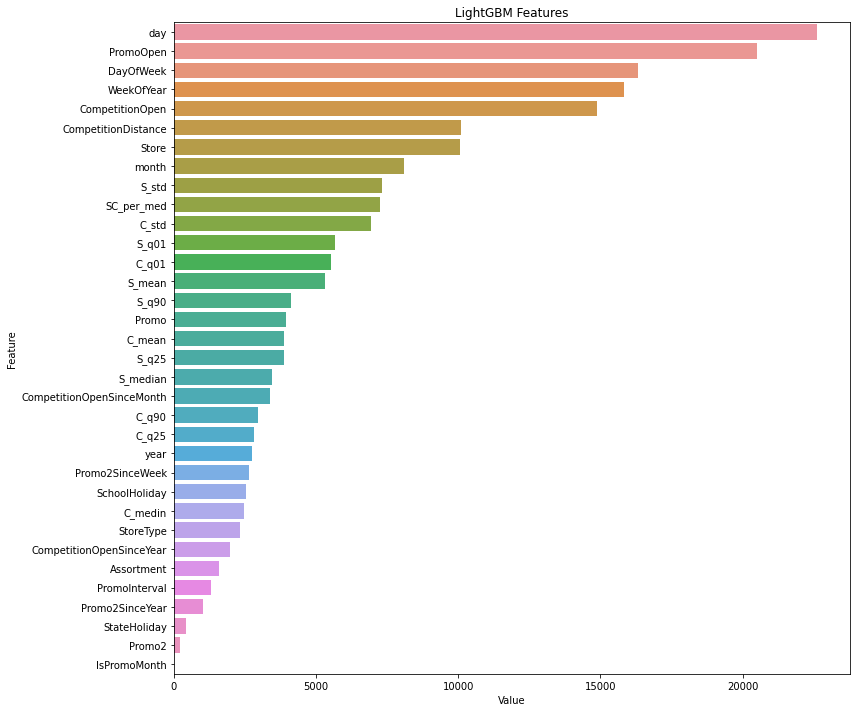

In [ ]:

import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [ ]:
y_pred_lgbm_t = lgbm.predict(full_test_no)

In [ ]:
y_lg=np.expm1(y_pred_lgbm_t).round(0)

In [ ]:
y_lg

array([3524., 6372., 4195., ..., 3762., 2668., 5827.])

In [ ]:
final_data1 = {'Index ': full_test_in.index1, 'Response':y_lg }
submission7 = pd.DataFrame(data=final_data1)

In [ ]:
final_data1 = {'Index ':test_Z.index1, 'Response':0 }
submission_od = pd.DataFrame(data=final_data1)

In [ ]:
df_row = pd.concat([submission7, submission_od])

In [ ]:
df_row=df_row.sort_values(by=['Index '],ascending=True)

In [ ]:
df_row.head()

,Index,Response
0,0,0.0
229,1,3524.0
457,2,6372.0
684,3,4195.0
911,4,7327.0


In [ ]:
%cd "/content"
df_row.to_csv('tt.csv', index =False)

/content


# big

In [ ]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=10, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(**param)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_lgbm))))

    errlgb.append(sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_lgbm))))
    p = lgbm.predict(full_test_no)
    y_pred_totlgb.append(p)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.08376689830745715


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.08364663824053589


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.08483979428336154


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.08302445405336285


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.0836391373807969


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.08335653640119108


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.08437001614626098


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.0829693802566818


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.08652483065431057


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.08492943756462487


In [ ]:
np.mean(errgb,0)

NameError: ignored

In [ ]:
y_pred_totlgb

In [ ]:
gb_fib = np.expm1(np.mean(y_pred_totlgb,0))
gb_fib

array([3548.08980605, 6395.96070493, 4057.76544875, ..., 3798.46403554,
       2708.39412629, 5862.45946329])

In [ ]:
final_data1 = {'Index ': full_test_in.index1, 'Response':gb_fib }
submission7 = pd.DataFrame(data=final_data1)

In [ ]:
gb_fib_j= pd.concat([submission7, submission_od])

In [ ]:
gb_fib_j= gb_fib_j.sort_values(by=['Index '],ascending=True)

In [ ]:
gb_fib_j

,Index,Response
0,0,0.000000
229,1,3548.089806
457,2,6395.960705
684,3,4057.765449
911,4,7270.943914
...,...,...
81273,305158,10410.365192
187968,305159,7014.540422
110443,305160,3798.464036
63033,305161,2708.394126


In [ ]:
%cd "/content"
gb_fib_j.to_csv('we_will.csv', index =False)

/content


In [ ]:
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

In [ ]:
import xgboost as xgb

params = {"objective": "reg:linear", # for linear regression
          "booster" : "gbtree",   # use tree based models 
          "eta": 0.03,   # learning rate
          "max_depth": 10,    # maximum depth of a tree
          "subsample": 0.9,    # Subsample ratio of the training instances
          "colsample_bytree": 0.7,   # Subsample ratio of columns when constructing each tree
          "silent": 1,   # silent mode
          "seed": 10   # Random number seed
          }
num_boost_round = 4000

dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_test, y_test)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
# train the xgboost model
model = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
early_stopping_rounds= 100, feval=rmspe_xg, verbose_eval=True)

[0]	train-rmse:8.0395	eval-rmse:8.04076	train-rmspe:0.999813	eval-rmspe:0.999814
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:7.79855	eval-rmse:7.79977	train-rmspe:0.999718	eval-rmspe:0.999719
[2]	train-rmse:7.56473	eval-rmse:7.56596	train-rmspe:0.999602	eval-rmspe:0.999602
[3]	train-rmse:7.33803	eval-rmse:7.33922	train-rmspe:0.99946	eval-rmspe:0.999461
[4]	train-rmse:7.11814	eval-rmse:7.11928	train-rmspe:0.999288	eval-rmspe:0.999289
[5]	train-rmse:6.90483	eval-rmse:6.90599	train-rmspe:0.999081	eval-rmspe:0.999083
[6]	train-rmse:6.6979	eval-rmse:6.69901	train-rmspe:0.998836	eval-rmspe:0.998838
[7]	train-rmse:6.49712	eval-rmse:6.49825	train-rmspe:0.998544	eval-rmspe:0.998547
[8]	train-rmse:6.30242	eval-rmse:6.30353	train-rmspe:0.9982	eval-rmspe:0.998204
[9]	train-rmse:6.11366	eval-rmse:6.11473	train-rmspe:0.997796	eval-rmspe:0.997799
[10]	train-rmse:5.93039	eval-rmse:5.931

In [ ]:
y_pred = model.predict(xgb.DMatrix(X_test))
error = rmspe(np.expm1(y_test), np.expm1(y_pred))
print('RMSPE: {:.4f}'.format(error))

RMSPE: 0.0977


Best weight is 1.0, RMSPE is 0.0977


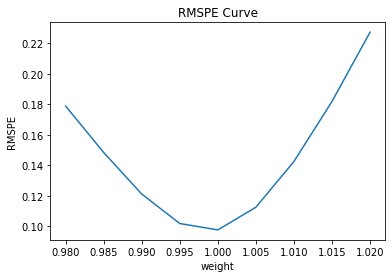

In [ ]:
# rmspe correction on the whole
def correction():
    weights = np.arange(0.98, 1.02, 0.005)
    errors = []
    for w in weights:
        error = rmspe(np.expm1(y_test), np.expm1(y_pred*w))
        errors.append(error)
        
    # make line plot
    plt.plot(weights, errors)
    plt.xlabel('weight')
    plt.ylabel('RMSPE')
    plt.title('RMSPE Curve')
    # print min error
    idx = errors.index(min(errors))
    print('Best weight is {}, RMSPE is {:.4f}'.format(weights[idx], min(errors)))
    
correction()

In [ ]:
dtrain = xgb.DMatrix(X, y)
dtest = xgb.DMatrix(full_test_no)
# specify parameters via map
params = {"objective": "reg:linear", # for linear regression
          "booster" : "gbtree",   # use tree based models 
          "eta": 0.03,   # learning rate
          "max_depth": 10,    # maximum depth of a tree
          "subsample": 0.9,    # Subsample ratio of the training instances
          "colsample_bytree": 0.7,   # Subsample ratio of columns when constructing each tree
          "silent": 1,   # silent mode
          "seed": 10   # Random number seed
          }
num_round = 3000
model = xgb.train(params, dtrain, num_round)
# make prediction
preds = model.predict(dtest)

full_test_in.index1

In [ ]:
preds

array([8.185378 , 8.802223 , 8.311844 , ..., 8.308566 , 7.8617845,
       8.695834 ], dtype=float32)

In [ ]:
p=np.expm1(preds).round(2)

In [ ]:
p

array([3587.1 , 6648.01, 4070.81, ..., 4057.49, 2595.15, 5976.96],
      dtype=float32)

In [ ]:
final_data1 = {'Index ': full_test_in.index1, 'Response':p }
submission7 = pd.DataFrame(data=final_data1)

In [ ]:
new= pd.concat([submission7, submission_od])

In [ ]:
new= new.sort_values(by=['Index '],ascending=True)

In [ ]:
new

,Index,Response
0,0,0.000000
229,1,3587.100098
457,2,6648.009766
684,3,4070.810059
911,4,7270.810059
...,...,...
81273,305158,9366.049805
187968,305159,7066.649902
110443,305160,4057.489990
63033,305161,2595.149902


In [ ]:
%cd "/content"
new.to_csv('best_one.csv', index =False)

/content


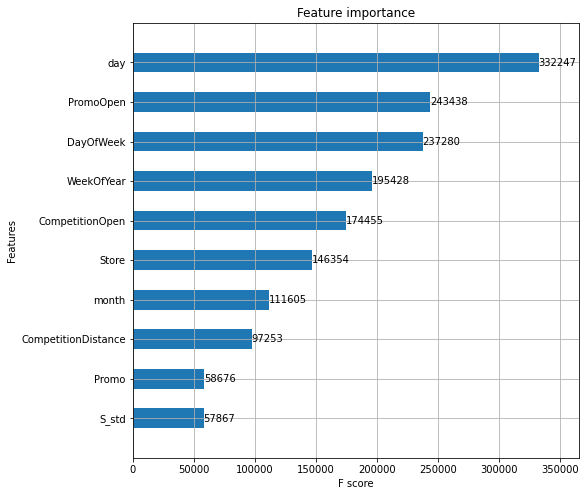

In [ ]:
# plot feature importance, show top 10 features
fig, ax = plt.subplots(figsize=(8,8))
xgb.plot_importance(model, max_num_features= 10, height=0.5, ax=ax)
plt.show()

In [ ]:
# make submission using best weight
result = pd.DataFrame({"Id": test[""],'Sales': np.expm1(preds*1.0)})
result.to_csv("submission_xgb.csv", index=False)

# plot feature importance, show top 10 features
fig, ax = plt.subplots(figsize=(8,8))
xgb.plot_importance(model, max_num_features= 10, height=0.5, ax=ax)
plt.show()

NameError: ignored